In [8]:
import numpy as np
import pandas as pd
import xarray as xr
from matplotlib import pyplot as plt

### Reading profiles

In [5]:
# Read in observation of temperature
from mlflux.gotm import process_file
path = '/home/jw8736/test-gotm/ensem/2012-01-01_2020-01-01/'
# file_path = path + 'tprof_papa_hourly' # not uniform (upper 300m) verqtical layers, hourly
# file_path = path + 'tprof_woa.dat' # uniform vertical fqull depth but monthly

zgrid = np.linspace(-200,-1,200) + 0.5

###### Read in tprof and save to netcdf ########
# file_path = path + 'tprof.dat' # uniform vertical (upper 300m), roughly 6 hourly
# t, var_full = process_file(file_path, zgrid)
# ds = xr.Dataset({'temp':(['t','z'], np.array(var_full))},
#                 coords={'t': t,
#                         'z': zgrid})
# ds.to_netcdf(path + 'tprof.nc')

###### Read in sprof and save to netcdf ########
# file_path = path + 'sprof.dat' # uniform vertical (upper 300m), roughly 6 hourly
# t, var_full = process_file(file_path, zgrid)
# ds = xr.Dataset({'salinity':(['t','z'], np.array(var_full))},
#                 coords={'t': t,
#                         'z': zgrid})
# ds.to_netcdf(path + 'sprof.nc')

ds_t = xr.load_dataset(path + 'tprof.nc')
ds_s = xr.load_dataset(path + 'sprof.nc')

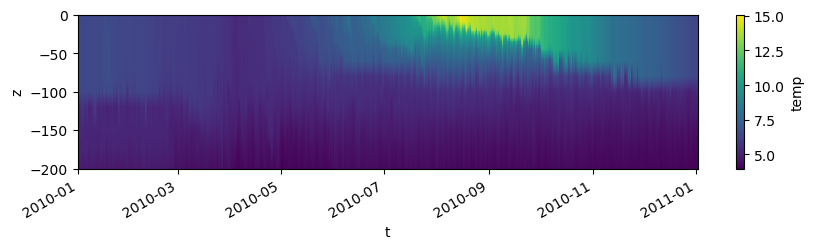

In [14]:
plt.figure(figsize=[10,2])
ds.temp.sel(t=slice('2010-01-01','2011-01-01')).plot(x='t')

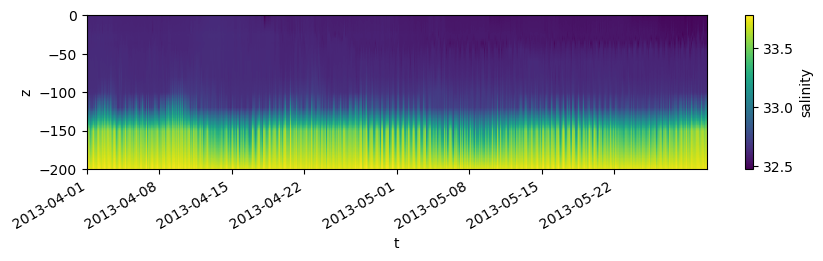

In [6]:
ds1 = xr.load_dataset(path + 'sprof.nc')
plt.figure(figsize=[10,2])
ds1.salinity.sel(t=slice('2013-04-01','2013-05-30')).plot(x='t')


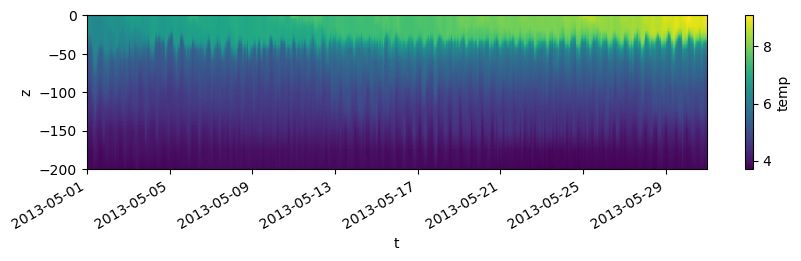

In [25]:
ds1 = xr.load_dataset(path + 'tprof.nc')
plt.figure(figsize=[10,2])
ds1.temp.sel(t=slice('2013-05-01','2013-05-30')).plot(x='t')

### Reading fluxes

In [5]:
from mlflux.gotm import read_vars
path = '/home/jw8736/test-gotm/ensem/2012-01-01_2020-01-01/'
file_swr = {'filename':'swr.dat', 'columns':['swr']}
file_Q = {'filename':'heatflux.dat', 'columns':['Q']}
files = [file_swr, file_Q]
df = read_vars (path, files, datetimeformat='%Y-%m-%d %H:%M:%S')

df = df.set_index('datetime')
ds = xr.Dataset.from_dataframe(df)

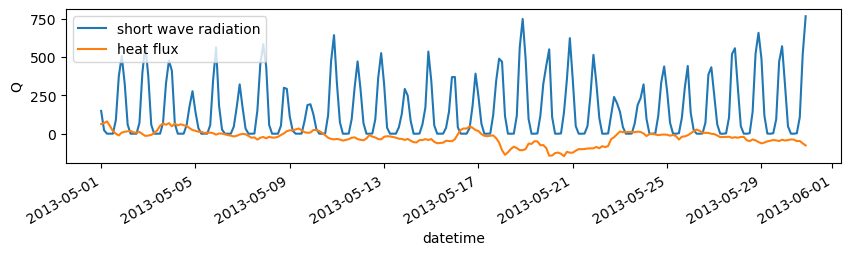

In [17]:
fig = plt.figure(figsize=[10,2])
ds.swr.sel(datetime=slice('2013-05-01','2013-05-30')).plot(label='short wave radiation')
ds.Q.sel(datetime=slice('2013-05-01','2013-05-30')).plot(label='heat flux')
plt.legend()